In [23]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import numpy as np
from IPython.display import Image


# Начнем с морских гребешков

In [5]:
data = pd.read_csv('abalone.csv')
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [6]:
half = len(data['Length']) / 2 
sam1 = data.loc[:half, 'Length'] 
sam2 = data.loc[half:, 'Length'] 
stats.ttest_ind(sam2, sam1)

Ttest_indResult(statistic=1.5565212835974083, pvalue=0.11965998094160571)

# Дисперсионный анализ и раковины

In [14]:
#Дисперсионный анализ.

from scipy.stats import f_oneway

# Вот некоторые данные [3] об измерении раковины (длина рубца передней приводящей мышцы, 
# стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
# Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия; 
# и Tvarminne, Финляндия, взяты из гораздо большего набора данных, использованных McDonald et al. (1991).

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

alpha = 0.05   # Уровень значимости
print(F, p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

7.121019471642447 0.0002812242314534544
Different distribution (reject H0)


# Можете привести пример когда выборки зависимы, а когда нет ?

In [19]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)


# Генерим две независимых выборки
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# Сравнение образцов


stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (отвергнуть H0)')

Statistics=4025.000, p=0.009
Different distribution (отвергнуть H0)


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

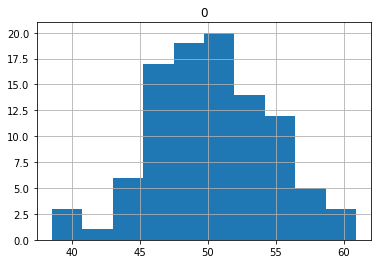

In [17]:
# pd.DataFrame(data1).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

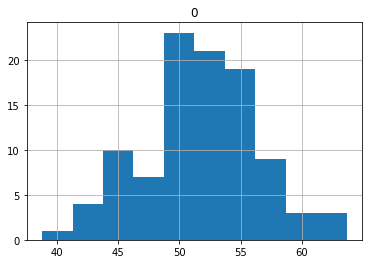

In [18]:
# pd.DataFrame(data2).hist()

# Какие выборки зависимы? Приведите примеров

In [20]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
seed(1)



# Генерим две независимых выборки
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples


stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1886.000, p=0.028
Different distribution (reject H0)


In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

# Задания для самостоятельного решения

#### 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [27]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

stats.ttest_ind(A, B)

stat, p = mannwhitneyu(A, B)
print(p)
if p < 0.05:
    print('Можем опровергнуть H0. Не наблюдается разница в эффекте')
else:
    print('Недостаточно оснований для отклонения H0. Наблюдается разница в эффекте')

0.054347680446611354
Недостаточно оснований для отклонения H0. Наблюдается разница в эффекте


#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [28]:
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

stat, p = wilcoxon(A, B)
print(p)
if p < 0.05:
    print('Можем опровергнуть H0. Не наблюдается разница в эффекте')
else:
    print('Недостаточно оснований для отклонения H0. Наблюдается разница в эффекте')

0.04077572901549266
Можем опровергнуть H0. Не наблюдается разница в эффекте


#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 


water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [29]:
from scipy.stats import f_oneway

water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p = f_oneway(water, nutri, mineral)

alpha = 0.05   # Уровень значимости
print(F, p)

if p > alpha:
    print('Same distribution (fail to reject H0). Эффект от минералки есть')
else:
    print('Different distribution (reject H0). Эффекта от минералки нет')

12.525963044834192 2.9240047906326866e-05
Different distribution (reject H0). Эффекта от минералки нет


# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

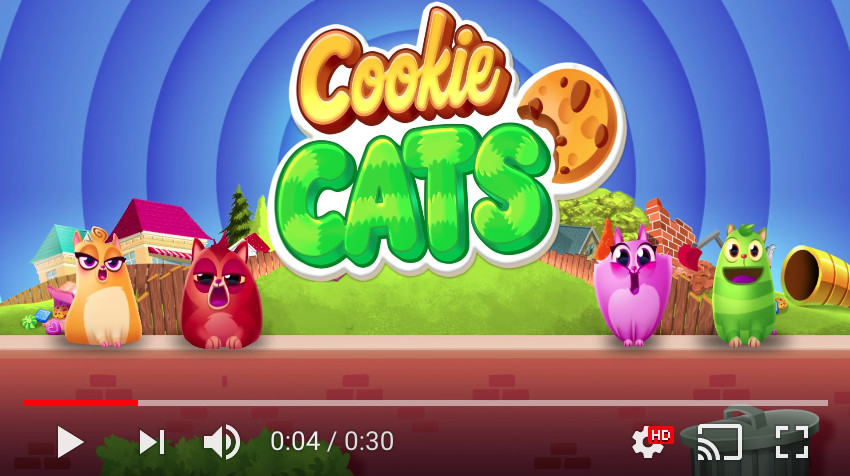

In [16]:
Image("cookie_cats_video.jpeg")

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

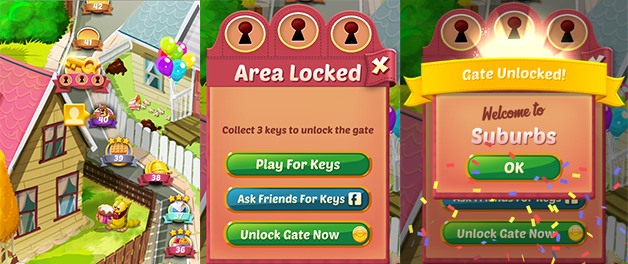

In [17]:
Image("cc_gates.png")

# Данные A/B тестирования

In [30]:
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [31]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


#Ваши выводы
Выборки примерно одинаковы, а значит результаты А/Б будут более точные, в отношении на 30 или 40 уровне делать изменения.

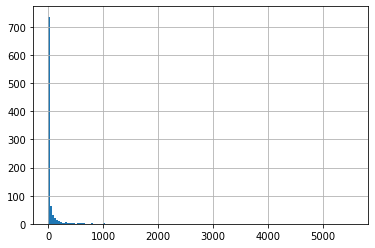

In [34]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=150)  # попробуйте поварировать bins=150

#Ваши выводы
Практические в начале игры количество игроков резко уменьшается, следом начинается плавное снижение. Можно предположить, что резкое падение вызавано "воротами".

Text(0.5, 0, '# Game rounds')

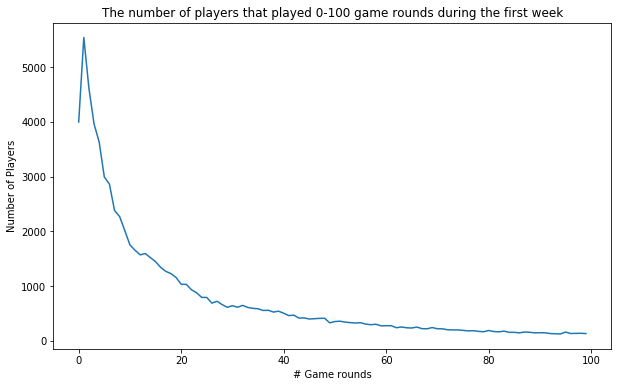

In [35]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

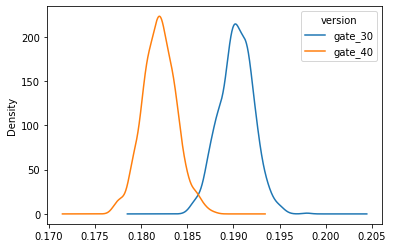

In [36]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

#Ваши выводы?

Можно предположить, что кол-во продолжевших играть после 30 уровня выше, чем после 40 уровня, что говорит нам о плохой затеи переносить воротана 40 уровень.

In [39]:
## Подвердим гипотезу, для этого циспользуем дисперсионный анализ, так как выборки не связаны


gate_30 = data.loc[data['version'] == 'gate_30']
gate_40 = data.loc[data['version'] == 'gate_40']

F, p = stats.f_oneway(gate_30["sum_gamerounds"], gate_40["sum_gamerounds"])

alpha = 0.05   # Уровень значимости
print('Statistics=%.3f, p=%.3f' % (F, p))

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.794, p=0.373
Same distribution (fail to reject H0)


In [40]:
# При наличии двух выборок, можем применить t-критерий Стьюдента и проверить наше предположение
t, p_value = stats.ttest_ind(a=gate_30["sum_gamerounds"], b=gate_40["sum_gamerounds"], equal_var=False)
t, p_value

(0.8854374331270672, 0.37592438409326223)

Похоже,что статистически значимой разницы между выборками нет, но при положительном значение t-параметра, можем сказать, некоторое положительное отклонение в сторону выборки gate_30 есть и даже при таком минимальном различии перенос ворот с 30 уровня не будет иметь положительного результата.